In [2]:
from sentinelsat import SentinelAPI

user = 's5pguest' 
password = 's5pguest' 
api = SentinelAPI(user, password, 'https://s5phub.copernicus.eu/dhus/#/home')

In [21]:
#import the necessary libraries
import netCDF4 as nc4
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import os 

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


In [2]:
files=list()
for filename in os.listdir(r"C:\Users\User\gitHub\methane data"):
    files.append( filename)

In [3]:
import os
files_withDirectory=list()
# List all files in a directory using os.listdir
basepath = r"C:\Users\User\gitHub\methane data"
for entry in os.listdir(basepath):
    files=os.path.join(basepath, entry)
    files_withDirectory.append(files)
    #print(files)

In [4]:
files_withDirectory[0]

'C:\\Users\\User\\gitHub\\methane data\\S5P_OFFL_L2__CH4____20200429T104122_20200429T122253_13181_01_010302_20200501T033911.nc'

In [5]:
#Load the .nc file as read only
#file_name = r'C:\Users\User\gitHub\methane data\S5P_OFFL_L2__CH4____20200429T190853_20200429T205024_13186_01_010302_20200501T113808.nc'
opened_file = Dataset(files_withDirectory[20], mode='r')
#print(opened_file)

In [6]:
# groups in the data
#print(opened_file.groups)

In [7]:
#examine the product group
#print(opened_file.groups['PRODUCT'])

In [8]:
#print(opened_file.groups['PRODUCT'].dimensions)

In [9]:
#print(opened_file.groups['PRODUCT'].dimensions.keys())

In [10]:
#print(opened_file.groups['PRODUCT'].dimensions['time'])

In [11]:
#examine the group Metadata
#print(opened_file.groups['METADATA'])

In [12]:
#Variables are where all the data we will use are stored. Print this to inspect
#print(opened_file.groups['PRODUCT'].variables)

In [13]:
#print(opened_file.groups['PRODUCT'].variables.keys())

In [14]:
#Get the data about methane_mixing_ratio
#print(opened_file.groups['PRODUCT'].variables['methane_mixing_ratio_precision'])

In [15]:
#print(opened_file.groups['PRODUCT'].variables['methane_mixing_ratio_bias_corrected'])

In [16]:
#We need to convert the 3d array to a 2d array
lons = opened_file.groups['PRODUCT'].variables['longitude'][:][0,:,:]
lats = opened_file.groups['PRODUCT'].variables['latitude'][:][0,:,:]
ch4 = opened_file.groups['PRODUCT'].variables['methane_mixing_ratio'][0,:,:]
print (lons.shape)
print (lats.shape)
print (ch4.shape)

(4172, 215)
(4172, 215)
(4172, 215)


In [18]:
min_lon=lons.min()
max_lon=lons.max()
min_lat=lats.min()
max_lat=lats.max()


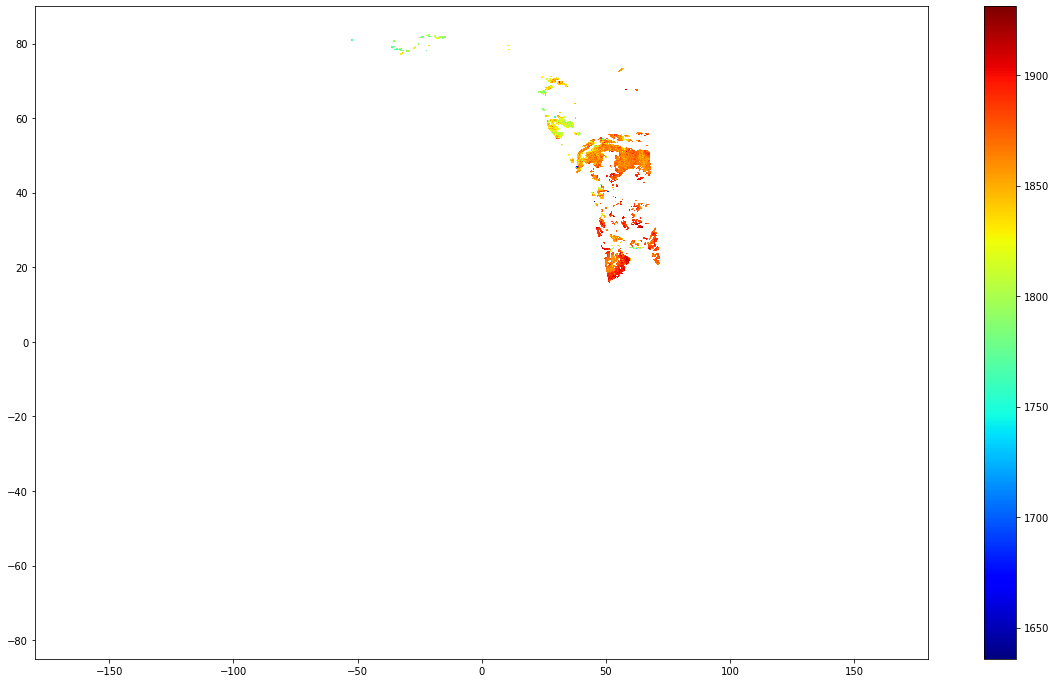

In [44]:
#Plot the data
plt.figure(figsize=(20,12))
plt.pcolor(lons, lats, ch4, cmap='jet')

plt.colorbar()
plt.show()


In [43]:
print(lons[0,0],lats[0,0],ch4[0,0])

30.013763 -84.20391 --


In [44]:
features = np.reshape(lons, (lons.shape[0]*lons.shape[1]))

In [45]:
print(len(features))

896980


In [46]:
feature_matrix = np.zeros((4172, 215)) 
for i in range(0,lons.shape[0]):
    for j in range(0,lons.shape[1]):
        feature_matrix[i][j] = ((int(lons[i,j]) + int(lats[i,j])))/2 #+ int(ch4[i,j]))/3)

In [47]:
features = np.reshape(feature_matrix, (lons.shape[0]*lons.shape[1])) 
features.shape


(896980,)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


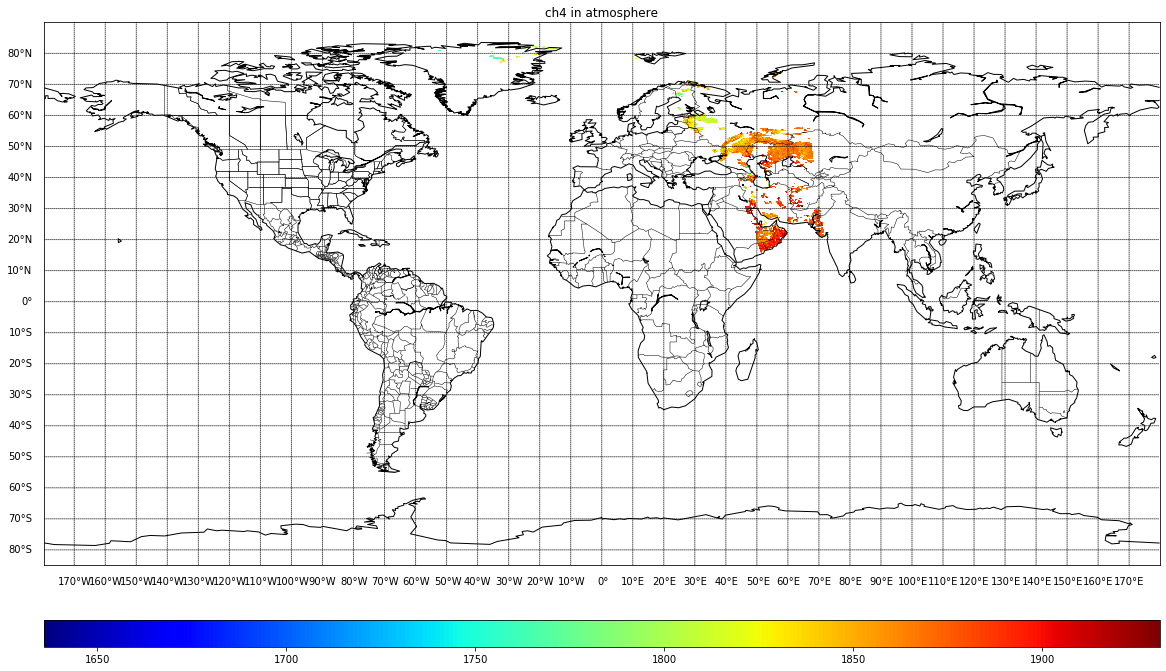

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

lon_0 = lons.mean()
lat_0 = lats.mean()

# m = Basemap(width=5000000,height=3500000,
#             resolution='l',projection='merc',\
#             lat_ts=90,lat_0=lat_0,lon_0=lon_0)
plt.figure(figsize=(20,12))
m = Basemap(projection='cyl',llcrnrlat=min_lat,urcrnrlat=max_lat,llcrnrlon=min_lon,urcrnrlon=max_lon,resolution='c')

xi, yi = m(lons, lats)

# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(ch4),cmap='jet')

# Add Grid Lines

m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")

# Add Title
plt.title('ch4 in atmosphere')

plt.show()